In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [ ]:
train = DataLoader(train_data, batch_size=64, shuffle=True)
test = DataLoader(test_data, batch_size=64)

In [ ]:
class_name = train_data.classes

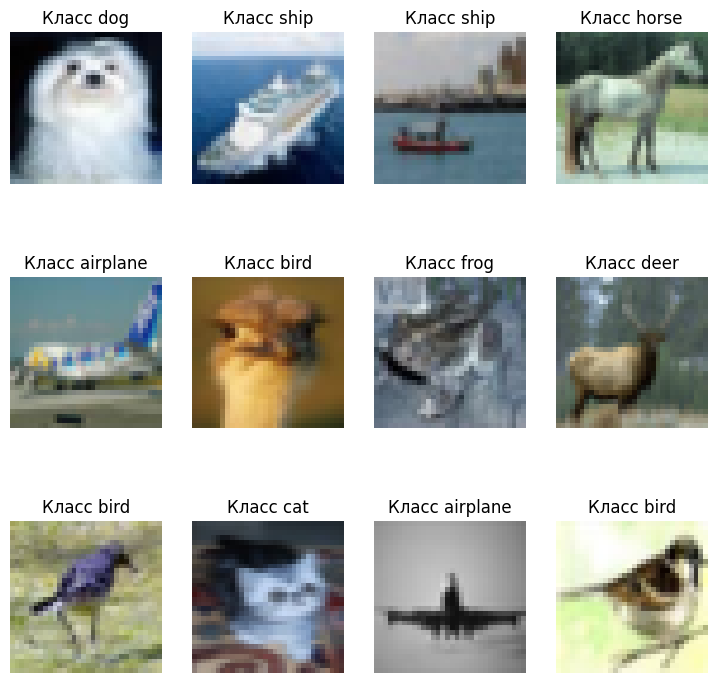

In [ ]:
image, label = next(iter(train))
plt.figure(figsize=(9, 9))
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(image[i].permute(1, 2, 0).squeeze())
  plt.title(f'Класс {class_name[label[i]]}')
  plt.axis('off')
plt.show()

In [ ]:
class CheckImage(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(3, 8, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(8 * 16 * 16, 32),
        nn.ReLU(),
        nn.Linear(32, 10)
    )
  def forward(self, x):
    x = self.conv(x)
    x = self.fc(x)
    return x

In [ ]:
model = CheckImage().to(device)

In [ ]:
cross = nn.CrossEntropyLoss()
optimaze = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(10):
  model.train
  total_loss = 0
  for x_batch, y_batch in train:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)

    y_pred_train = model(x_batch)
    loss = cross(y_pred_train, y_batch)

    optimaze.zero_grad()
    loss.backward()
    optimaze.step()

    total_loss += loss.item()
  print(f'Эпоха {epoch+1}, Потери: {total_loss}')

Эпоха 1, Потери: 1487.9672175645828
Эпоха 2, Потери: 1306.1995663642883
Эпоха 3, Потери: 1218.5205492973328
Эпоха 4, Потери: 1159.623104095459
Эпоха 5, Потери: 1116.346707701683
Эпоха 6, Потери: 1083.5070515871048
Эпоха 7, Потери: 1062.0072448253632
Эпоха 8, Потери: 1042.2412630319595
Эпоха 9, Потери: 1029.8973618149757
Эпоха 10, Потери: 1018.418182849884


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
  for x_batch, y_batch in test:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_pred_test = model(x_batch)
    predicted = torch.argmax(y_pred_test, dim=1)

    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f'Точность модели на тестовых данных: {accuracy:.2f}%')

Точность модели на тестовых данных: 51.98%
